<a href="https://colab.research.google.com/github/ved-01/FutureSmart-AI-Blog/blob/LLamaindex_DataAgents/Llamaindex_DataAgents/Tool__Abstraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install llama_index
!pip install llama-hub
!pip install openai

In [ ]:
import openai
openai.api_key = 'your_key_here'

################## TextToImage Tool ##############

In [ ]:
from llama_index.agent import OpenAIAgent
from llama_index.tools import QueryEngineTool, ToolMetadata

In [ ]:
# define query engine over paul graham's essay
from llama_index import SimpleDirectoryReader, VectorStoreIndex
import requests

# download paul graham's essay
response = requests.get("https://www.dropbox.com/s/f6bmb19xdg0xedm/paul_graham_essay.txt?dl=1")
essay_txt = response.text
with open("pg_essay.txt", "w") as fp:
  fp.write(essay_txt)

# load documents
documents = SimpleDirectoryReader(input_files=['pg_essay.txt']).load_data()

# build index
index = VectorStoreIndex.from_documents(documents)

# query engine
query_engine = index.as_query_engine()

[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# build query engine tool
query_engine_tool = QueryEngineTool(
    query_engine=query_engine,
    metadata=ToolMetadata(
        name="paul_graham",
        description="Provides a biography of Paul Graham, from childhood to college to adult life",
    ),
)

In [ ]:
# Import and initialize our tool spec
from llama_hub.tools.text_to_image.base import TextToImageToolSpec
from llama_index.llms import OpenAI

llm = OpenAI(model="gpt-4")

text_to_image_spec = TextToImageToolSpec()
tools = text_to_image_spec.to_tool_list()
# Create the Agent with our tools
agent = OpenAIAgent.from_tools(tools + [query_engine_tool], llm=llm, verbose=True)

=== Calling Function ===
Calling function: generate_images with args: {
  "prompt": "car Paul Graham bought after Yahoo bought his company",
  "n": 1,
  "size": "1024x1024"
}
Got output: ['https://oaidalleapiprodscus.blob.core.windows.net/private/org-fNfMA1WYUetHN43sd19g3021/user-OZYOsULMHxwn95e27JEkU4Fe/img-a0Zj8PnmbV5uWcPUJgdvx5as.png?st=2023-08-24T08%3A08%3A54Z&se=2023-08-24T10%3A08%3A54Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-08-23T18%3A58%3A14Z&ske=2023-08-24T18%3A58%3A14Z&sks=b&skv=2021-08-06&sig=Z/GeyHuazK%2B7/nlQmSAbnlH6FHLUik0jG6FztsrVS%2BQ%3D']
=== Calling Function ===
Calling function: show_images with args: {
  "urls": ["https://oaidalleapiprodscus.blob.core.windows.net/private/org-fNfMA1WYUetHN43sd19g3021/user-OZYOsULMHxwn95e27JEkU4Fe/img-a0Zj8PnmbV5uWcPUJgdvx5as.png?st=2023-08-24T08%3A08%3A54Z&se=2023-08-24T10%3A08%3A54Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image

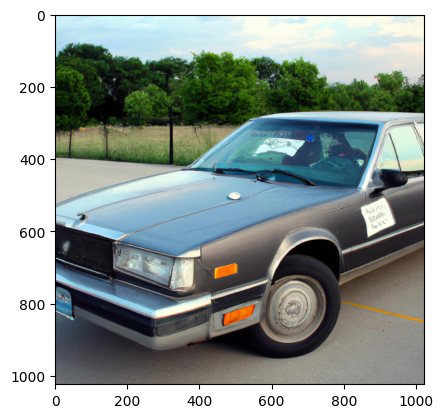

In [ ]:
print(agent.chat('generate an image of the car that Paul Graham bought after Yahoo bought his company'))


######## Database Tool ###########

In [ ]:
pip install mysqlclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mysqlclient: filename=mysqlclient-2.2.0-cp310-cp310-linux_x86_64.whl size=123669 sha256=48eb1ee3e9db44a6a105f0646ace867315f5035e230eed5f0d82cfddae86c3b4
  Stored in directory: /root/.cache/pip/wheels/a4/f8/fd/0399687c0abd03c10c975ed56c692fcd3d0fb80440b5a661f1
Successfully built mysqlclient


In [ ]:
from llama_hub.tools.database.base import DatabaseToolSpec
db_spec = DatabaseToolSpec(
    scheme = "mysql", # Database Scheme
    host = "host", # Database Host
    port = "3306", # Database Port
    user = "user", # Database User
    password = "password", # Database Password
    dbname = "database", # Database Name
)

In [ ]:
tools = db_spec.to_tool_list()
for tool in tools:
    print(tool.metadata.name)
    print(tool.metadata.description)
    print(tool.metadata.fn_schema)


load_data
load_data(query: str) -> List[llama_index.schema.Document]
Query and load data from the Database, returning a list of Documents.

        Args:
            query (str): an SQL query to filter tables and rows.

        Returns:
            List[Document]: A list of Document objects.
        
<class 'pydantic.main.load_data'>
describe_tables
describe_tables(tables: Optional[List[str]] = None) -> str

        Describes the specifed tables in the database

        Args:
            tables (List[str]): A list of table names to retrieve details about
        
<class 'pydantic.main.describe_tables'>
list_tables
list_tables() -> List[str]

        Returns a list of available tables in the database.
        To retrieve details about the columns of specfic tables, use
        the describe_tables endpoint
        
<class 'pydantic.main.list_tables'>


In [ ]:
# Create the Agent with our tools
agent = OpenAIAgent.from_tools(tools, verbose=True)

In [ ]:
agent.chat('List the name of tables in the database')

=== Calling Function ===
Calling function: list_tables with args: {}
Got output: ['migrations', 'tbl_buy_list_transactions', 'tbl_customers', 'tbl_download_sample_log', 'tbl_markets', 'tbl_options', 'tbl_peoples', 'tbl_purchases', 'tbl_spf_record', 'tbl_users', 'tbl_vendors', 'users_db', 'tbl_product_category', 'tbl_products', 'tbl_product_chart_data', 'tbl_products_function', 'tbl_vars']


AgentChatResponse(response='The tables in the database are:\n1. migrations\n2. tbl_buy_list_transactions\n3. tbl_customers\n4. tbl_download_sample_log\n5. tbl_markets\n6. tbl_options\n7. tbl_peoples\n8. tbl_purchases\n9. tbl_spf_record\n10. tbl_users\n11. tbl_vendors\n12. users_db\n13. tbl_product_category\n14. tbl_products\n15. tbl_product_chart_data\n16. tbl_products_function\n17. tbl_vars', sources=[ToolOutput(content="['migrations', 'tbl_buy_list_transactions', 'tbl_customers', 'tbl_download_sample_log', 'tbl_markets', 'tbl_options', 'tbl_peoples', 'tbl_purchases', 'tbl_spf_record', 'tbl_users', 'tbl_vendors', 'users_db', 'tbl_product_category', 'tbl_products', 'tbl_product_chart_data', 'tbl_products_function', 'tbl_vars']", tool_name='list_tables', raw_input={'args': (), 'kwargs': {}}, raw_output=['migrations', 'tbl_buy_list_transactions', 'tbl_customers', 'tbl_download_sample_log', 'tbl_markets', 'tbl_options', 'tbl_peoples', 'tbl_purchases', 'tbl_spf_record', 'tbl_users', 'tbl_v